Hier laten we de grafieken zien van onze verschillende rule-based systems. En geven we een korte overvieuw over de andere bestanden.

# Blackjack.py 

Dit Python-bestand definieert de **BlackjackEnv** klasse, die de Blackjack-spelomgeving beheert en visualiseert met behulp van de Pygame-bibliotheek. De klasse maakt het mogelijk om een grafische weergave van het spel te simuleren, inclusief de dealer en speler, met de mogelijkheid om kaarten te delen, inzetten te plaatsen, en het spel te beheren. Hieronder volgt een kort overzicht van de belangrijkste onderdelen:

---

## **1. Initialisatie en Attributen**

- **Deck:**  
  Het deck wordt gecreëerd door de functie `create_deck()` en opgeslagen in `self.deck`. Het aantal kaarten wordt bepaald door het aantal decks dat wordt doorgegeven aan de constructor (`num_decks`).

- **Handen:**  
  Er worden attributen opgeslagen voor de handen van de speler (`self.player_hand`) en de dealer (`self.dealer_hand`), evenals de visualisatie van de kaarten op het scherm.

- **Spelstatus:**  
  De status van het spel wordt opgeslagen in `self.game_state` en kan de volgende waarden aannemen:
  - `"BETTING"`: De speler plaatst een inzet.
  - `"DEALING"`: De kaarten worden gedeeld.
  - `"PLAYER_TURN"`: Het is de beurt van de speler.
  - `"DEALER_TURN"`: Het is de beurt van de dealer.
  - `"ROUND_OVER"`: De ronde is voorbij.

- **Bet:**  
  De huidige inzet wordt opgeslagen in `self.current_bet`, en de speler heeft een startbalans van `STARTING_BALANCE`.

---

## **2. Functies voor Kaarten en Wedden**

- **place_bet():**  
  Laat de speler een inzet plaatsen en schakelt het spel over naar de `"DEALING"` fase.

- **deal_card():**  
  Deelt een kaart uit aan de speler of dealer, afhankelijk van de parameter `to_player`. Het visualiseert ook de beweging van de kaarten op het scherm.

- **reset_round():**  
  Reset de handen en begint een nieuwe ronde, met een controle of het deck opnieuw geschud moet worden.

---

## **3. Speler- en Dealeracties**

### **Speleracties:**

- **player_hit():**  
  De speler kiest ervoor om een extra kaart te trekken.

- **player_stand():**  
  De speler kiest ervoor om te passen, waarna de dealer aan de beurt komt.

### **Dealeracties:**

- **dealer_play():**  
  De dealer volgt de huisregels en trekt kaarten totdat de score 17 of hoger is.

---

## **4. Rondresolutie**

- **resolve_round():**  
  Na de speler- en dealerbeurten wordt de winnaar bepaald. De balans van de speler wordt aangepast afhankelijk van het resultaat van de ronde (winst, verlies of gelijkspel).

---

## **5. AI Spelerstrategie**

De **AI** voor de speler kiest acties op basis van een van de gedefinieerde strategieën, zoals:

- **Dealer Mimic:**  
  De speler speelt zoals de dealer (hitting bij een score lager dan 17).

- **Never Bust:**  
  De speler vermijdt te verliezen door altijd te passen als de score boven een bepaalde drempel ligt.

- **Basic Hard:**  
  Eenvoudige basisstrategie gebaseerd op de handscore van de speler en de zichtbare kaart van de dealer.

- **Cautious:**  
  De speler past sneller bij lage kaarten van de dealer.

- **Aggressive:**  
  De speler blijft agressiever spelen door vaker kaarten te trekken.

---

## **6. Weergave van het Spel**

- **render():**  
  Teken de huidige staat van het spel op het scherm, inclusief de kaarten van de speler en dealer, de score, de balans van de speler, en de actieve boodschap.

---

## **7. Deckbeheer**

- **check_deck():**  
  Controleert of er genoeg kaarten in het deck zijn. Als het deck te laag is (minder dan een kwart van de oorspronkelijke kaarten), wordt het deck opnieuw geschud.

---

### **Conclusie**

De **BlackjackEnv** klasse beheert de volledige Blackjack-spelomgeving, van het creëren van het deck en het beheren van de handen van de speler en dealer, tot de verwerking van de AI-acties en de visuele weergave van het spel. Dit bestand vormt de kern van de spelmechanica voor het Blackjack-spel.


# Card.py

Dit Python-bestand bevat de definitie van de **Card** klasse, die een speelkaart vertegenwoordigt met visuele eigenschappen en animaties in een Blackjack-spel. Hieronder volgt een kort overzicht van de code en de belangrijkste onderdelen van de klasse.

---

## **Overzicht**

De **Card** klasse beheert zowel de visuele weergave van een kaart als de animaties van kaartbewegingen in het spel.

### **Doel:**
De klasse vertegenwoordigt een kaart in het Blackjack-spel, inclusief de visuele weergave en animatie van de beweging van de kaart.

---

## **Attribuut Uitleg**

- **card_value:**  
  De waarde van de kaart (bijv. 'A', 'K', '7').

- **suit:**  
  Het type van de kaart (bijv. 'hearts', 'spades').

- **image_key:**  
  Een unieke sleutel voor het ophalen van de afbeelding van de kaart uit de afbeeldingendatabase.

- **image:**  
  De daadwerkelijke afbeelding van de kaart, geladen vanuit een vooraf ingestelde dictionary van kaartafbeeldingen.

- **start_pos en end_pos:**  
  De begin- en eindpositie voor de animatie van de kaart, gedefinieerd in coördinaten op het scherm.

- **position:**  
  De huidige positie van de kaart op het scherm, die tijdens de animatie verandert.

- **is_moving:**  
  Een boolean die aangeeft of de kaart nog in beweging is voor de animatie (true als de kaart beweegt, anders false).

---

## **Methoden**

### `__init__(self, ...)`  
Initialiseert de kaart met de juiste waarde, soort en afbeeldingsbron. De afbeelding wordt opgehaald via de functie `get_card_image_key()`. Als de afbeelding niet wordt gevonden, wordt een placeholder gebruikt.

### `update_position(self)`  
Beweegt de kaart soepel van de beginpositie naar de eindpositie. De afstand tussen de huidige positie en de doelpositie wordt berekend, en de kaart beweegt in kleine stappen totdat deze de doelpositie bereikt.

- **Drempelwaarde:**  
  Er wordt een drempelwaarde gebruikt om te stoppen wanneer de kaart voldoende dicht bij de eindpositie is.
  
- **Stapgrootte:**  
  De stapgrootte wordt berekend op basis van de afstand tussen de huidige en de eindpositie.

- **Beveiliging tegen overschrijding:**  
  Er is een beveiliging ingebouwd om te voorkomen dat de kaart voorbij de doelpositie beweegt.

### `draw(self, surface)`  
Teken de kaart op het opgegeven **surface**. Dit wordt bijvoorbeeld gebruikt om de kaart op het scherm te renderen.

---

## **Functies van de Klasse**

De **Card** klasse is verantwoordelijk voor:

- **Visuele representatie:**  
  Elke kaart heeft een visuele weergave, die wordt getrokken op het scherm.

- **Animatie:**  
  De kaart beweegt van een beginpositie naar een eindpositie, wat de visuele aantrekkelijkheid van het spel verhoogt.

- **Beheer van kaartbewegingen:**  
  Het speelt een belangrijke rol bij de animatie van kaarten die gedeeld worden aan de speler of de dealer. De kaart beweegt op het scherm om het spel dynamischer en visueel aantrekkelijker te maken.

---

### **Conclusie**

De **Card** klasse richt zich voornamelijk op de grafische representatie van de kaarten en hun animatie in het spel. Dit maakt het spel visueel dynamisch en interactief, wat bijdraagt aan de spelervaring.


# Constants.py

Deze code definieert de configuratie en instellingen voor een Blackjack-spel. Het behandelt visuele instellingen voor het scherm, de kaarten, de verschillende strategieën voor de AI, en de basisinstellingen voor het spel (zoals de beginbalans en de kaarten). Het biedt een solide basis voor het implementeren van de spelmechanica en het beheren van de kaarten en inzetten in het spel.

Als je verder wilt werken aan de logica van het spel of de interacties met de gebruiker, kun je deze instellingen gebruiken om de verschillende aspecten van het spel (zoals de kaartanimaties, spelersstrategieën en saldo) te beheren.

# Main.py 

Deze code definieert de hoofdgame-loop voor een Pygame Blackjack-spel, waarin de spelmechanismen en logica worden uitgevoerd. Hieronder volgt een beknopte uitleg van de belangrijkste onderdelen:

---

## 1. **Initialisatie**

- **Pygame en font-systeem:**  
  Pygame wordt geïnitialiseerd voor grafische weergave, en het fontsysteem wordt ingesteld.

- **Scherminstellingen:**  
  Het scherm wordt geconfigureerd met de opgegeven breedte en hoogte van het speelvenster.

- **Laad van Game-assets:**  
  De benodigde game-assets, zoals de kaartenafbeeldingen, worden geladen via de functie `load_card_images()`.  
  Indien het laden mislukt, wordt er een foutmelding weergegeven en het spel beëindigd.

---

## 2. **Spelomgeving**

- **Instantiatie van de Blackjack-omgeving:**  
  De `BlackjackEnv` klasse wordt geïnstantieerd. Dit object beheert de logica van het Blackjack-spel.

- **Nieuw rondje starten:**  
  Het spel wordt ingesteld voor een nieuw rondje, waarbij een boodschap over het inzetten wordt weergegeven voor de speler.

---

## 3. **Gebeurtenisverwerking**

- **Toetsaanslagen:**  
  Het spel reageert op toetsaanslagen van de speler:
  - `'B'` om te **inzetten**.
  - `'H'` om te **slaan** (hit).
  - `'S'` om te **passen** (stand).

- **Muisklikken:**  
  Het spel verwerkt muisklikken voor knoppen zoals **"Hit"**, **"Stand"** en **"Bet"**.

- **Timergebeurtenissen:**  
  Gebruikt om vertraging toe te voegen voor acties zoals het delen van de eerste kaarten, wat de speelervaring vloeiender maakt.

---

## 4. **Game-logica**

- **Kaartanimaties:**  
  Het spel controleert of alle kaarten gestopt zijn met animeren voordat de volgende spelactie (zoals de beurt van de AI of dealer) wordt uitgevoerd.

- **AI-acties:**  
  Tijdens de beurt van de speler wordt de AI-logica uitgevoerd als de speler een AI-speler is.

- **Dealerbeurt:**  
  Na de speler is het de beurt aan de dealer, waarbij de dealer zich aan de regels van het spel houdt.

- **Einde van de ronde:**  
  Bij het einde van de ronde wordt het spel na een korte vertraging automatisch gereset voor een nieuw rondje.

---

## 5. **Weergave**

- **Rendering van het spel:**  
  De huidige staat van het spel wordt continu gerenderd en weergegeven op het scherm.

- **Schermupdate:**  
  Het scherm wordt regelmatig bijgewerkt om de meest actuele informatie en beelden van het spel weer te geven.

---

## 6. **Frame Rate**

- **Beheer van de frame rate:**  
  Het spel draait met een vaste frame rate van **60 FPS** (frames per seconde) om een vloeiende en consistente ervaring te garanderen.

---

### Samenvatting

Deze code beheert het complete verloop van een Blackjack-ronde, van het **plaatsen van de inzet** tot het **spelen van de hand** door zowel de speler als de dealer. Het omvat AI-beslissingen, de grafische weergave van kaarten, en de logica voor het afhandelen van beurten en ronde-eindes.



# Test_ai.py

Deze code simuleert verschillende Blackjack-strategieën voor een AI-speler, voert meerdere rondes uit, en slaat de resultaten op in een CSV-bestand.

## Functies:

### `simulate_ai(strategy, rounds, bet_amount)`
**Doel**: Voert een simulatie uit voor een specifieke AI-strategie over een aantal ronden.

#### Werking:
- Het spel wordt ingesteld met de gekozen strategie en aantal ronden.
- De AI plaatst een inzet en speelt volgens de gekozen strategie (`player_ai_action()`).
- Na elke ronde wordt het resultaat geregistreerd (winst, verlies, of gelijkspel).
- Het resultaat van elke ronde wordt opgeslagen in een lijst.

### `main()`
**Doel**: Voert de simulaties voor meerdere strategieën en slaat de resultaten op in een CSV-bestand.

#### Werking:
- De lijst van strategieën wordt gedefinieerd, samen met het aantal ronden en de inzet per ronde.
- De `simulate_ai()` functie wordt voor elke strategie aangeroepen, en de resultaten van elke simulatie worden verzameld.
- De verzamelde resultaten worden omgezet in een pandas DataFrame en opgeslagen als een CSV-bestand.
- Een map `tests` wordt aangemaakt (indien deze nog niet bestaat) om de CSV-bestand op te slaan.

## Hoofdpunten:

- **Assets Laden**: De benodigde afbeeldingen voor de kaarten worden geladen via `load_card_images()`.
- **Spelomgeving**: Elke simulatie gebruikt een nieuwe `BlackjackEnv` instantie om de Blackjack-omgeving op te zetten.
- **AI Strategieën**: Er worden vijf verschillende strategieën getest:
  - `STRAT_DEALER_MIMIC`
  - `STRAT_NEVER_BUST`
  - `STRAT_BASIC_HARD`
  - `STRAT_CAUTIOUS`
  - `STRAT_AGGRESSIVE`
- **Resultaten Opslaan**: De resultaten van elke ronde worden in een DataFrame gezet en opgeslagen als een CSV-bestand.

## Samenvatting:
- De code voert een simulatie van meerdere Blackjack-strategieën uit en verzamelt gegevens over elke ronde (balans voor en na de ronde, het resultaat van de ronde, enz.).
- De resultaten worden opgeslagen in een CSV-bestand voor verdere analyse.


# Utils.py

Deze code bevat een aantal functies die te maken hebben met het laden van kaartenafbeeldingen, het creëren van een deck, en het berekenen van de waarde van een hand in Blackjack.

## Functies

### `load_card_images()`
**Doel**: Laadt de afbeeldingen van de kaarten en de afbeelding van de achterkant van het deck.

#### Werking:
1. De functie zoekt naar de map `CARDS_FOLDER` om de kaartenafbeeldingen te laden.
2. Voor elke kaart (bepaalde combinatie van `value` en `suit`), wordt geprobeerd de afbeelding te laden.
3. Als een afbeelding niet kan worden gevonden, wordt een tijdelijke `placeholder` afbeelding gecreëerd.
4. Ook wordt de afbeelding van de achterkant van het deck geladen. Als deze niet gevonden kan worden, wordt er een eenvoudige placeholder gebruikt.

#### Output:
- De functie retourneert een `deck_image` (de afbeelding van de achterkant van het deck) en een dictionary van afbeeldingen van de kaarten.

### `create_placeholder_card(value, suit)`
**Doel**: Maakt een tijdelijke placeholder-afbeelding voor een kaart die ontbreekt.

#### Werking:
- Creëert een rechthoekige afbeelding van een kaart met een witte achtergrond en een grijze rand.
- De tekst op de kaart toont de afkortingen van de `value` en `suit` (bijv. "A♠" voor Ace van Schoppen).

#### Output:
- Een Surface-object dat de placeholder-kaart weergeeft.

### `get_card_image_key(card_value, suit)`
**Doel**: Genereert de sleutel voor het opzoeken van de afbeelding van een kaart.

#### Werking:
- De sleutel wordt samengesteld uit de `card_value` en `suit`, bijvoorbeeld "ace_of_spades" voor een Aas van Schoppen.

#### Output:
- Een string die de sleutel van de kaartafbeelding is, bijvoorbeeld `"ace_of_spades"`.

### `calculate_hand_value(hand)`
**Doel**: Berekent de waarde van een hand in Blackjack.

#### Werking:
- Elke kaart in de hand wordt geëvalueerd:
  - Face cards (`jack`, `queen`, `king`) tellen als 10 punten.
  - Azen kunnen 1 of 11 zijn, afhankelijk van de waarde van de hand.
  - Andere kaarten tellen als hun numerieke waarde.
- Als de waarde van de hand meer dan 21 is, worden Azen die als 11 geteld zijn, naar 1 omgezet.

#### Output:
- De totale waarde van de hand in Blackjack.

### `create_deck(num_decks=DEFAULT_NUM_DECKS)`
**Doel**: Maakt en schudt een deck van kaarten, met het opgegeven aantal standaard decks.

#### Werking:
- De kaarten worden gegenereerd voor het opgegeven aantal decks.
- Alle kaarten worden geschud.
- De standaardkaarten zijn afkomstig van de `SUITS` (harten, ruiten, schoppen, klaveren) en de `VALUES` (Aas, 2-10, Boer, Vrouw, Koning).

#### Output:
- Een lijst van geshuffelde kaarten.

## Configuratie:
- **Kaartafbeeldingen**: De afbeeldingen worden geladen uit de map gespecificeerd door de constante `CARDS_FOLDER`.
- **Deck van kaarten**: De kaarten worden gegenereerd en geschud op basis van het opgegeven aantal decks (standaard 3).
- **Kaartmaten**: Alle kaarten worden geschaald naar de afmetingen gedefinieerd door `CARD_WIDTH` en `CARD_HEIGHT`.

## Samenvatting:
Deze code behandelt de essentie van het laden van kaartenafbeeldingen voor een Blackjack-spel, het creëren van een deck en het berekenen van de waarde van een hand. Dit biedt de basis voor het visueel weergeven van de kaarten en het berekenen van de scores tijdens het spel.


In [4]:
import pandas as pd

df = pd.read_csv(r"C:\Users\caspe\Jaar 3\Autominis\Opdracht 1\tests\ai_simulation_results.csv")
df

,round,ai_strategy,bet,old_balance,new_balance,result
0,1,DEALER_MIMIC,50,1000,1050,win
1,2,DEALER_MIMIC,50,1050,1000,loss
2,3,DEALER_MIMIC,50,1000,1050,win
3,4,DEALER_MIMIC,50,1050,1100,win
4,5,DEALER_MIMIC,50,1100,1050,loss
...,...,...,...,...,...,...
495,96,AGGRESSIVE,50,725,675,loss
496,97,AGGRESSIVE,50,675,725,win
497,98,AGGRESSIVE,50,725,775,win
498,99,AGGRESSIVE,50,775,725,loss


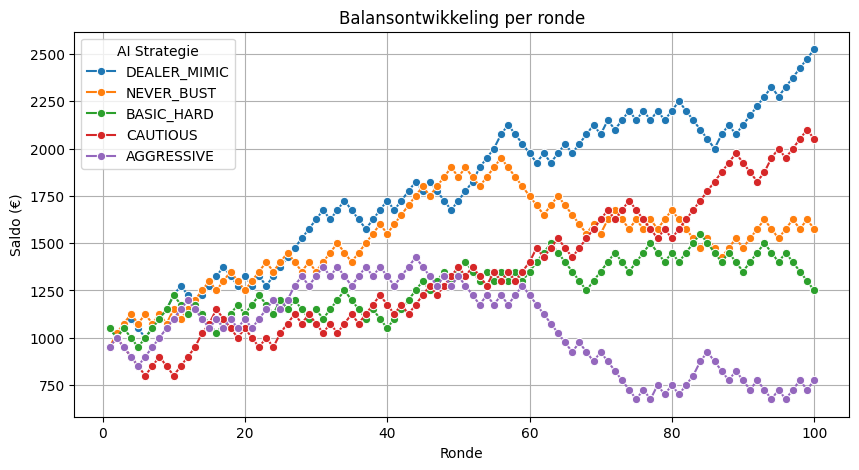

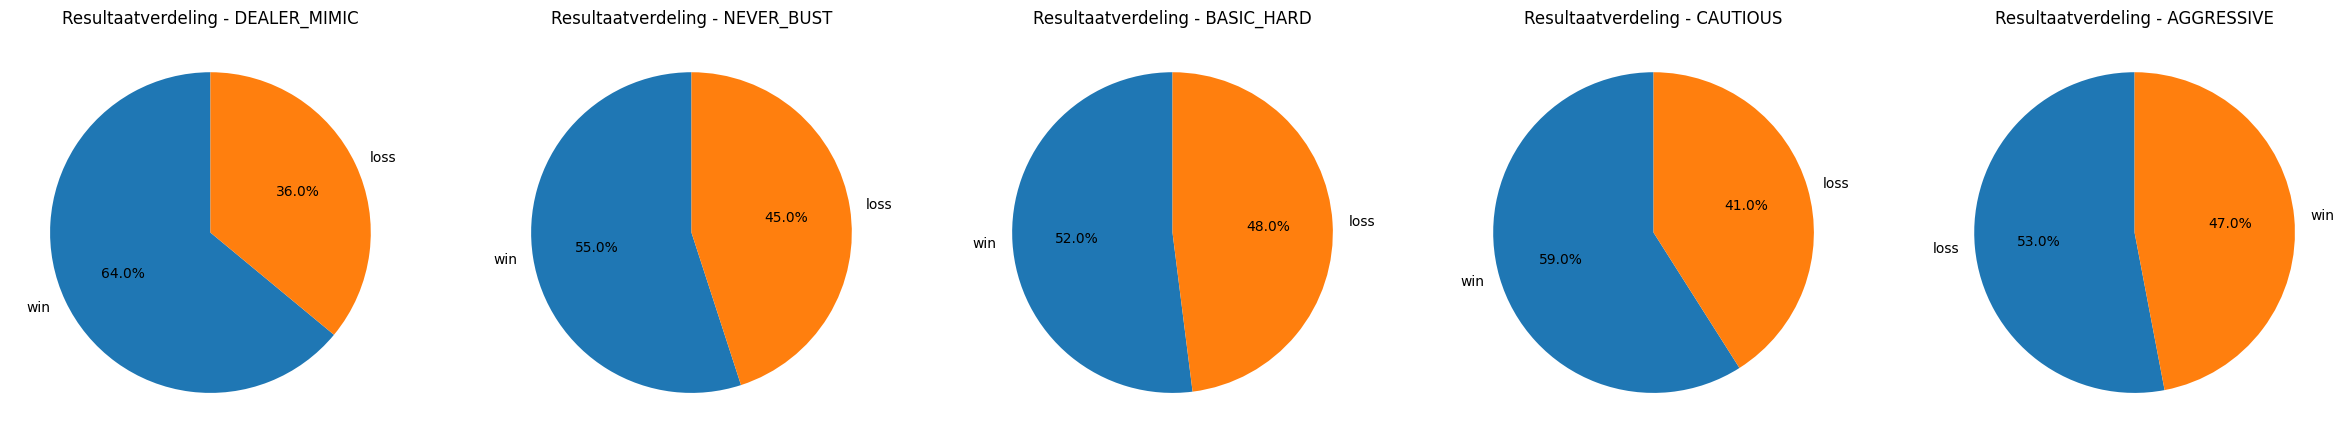

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Laad de dataset
# Zorg ervoor dat de kolommen correct zijn
#df.columns = df.columns.str.strip()

# 1. Balans over tijd (lijnplot)
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='round', y='new_balance', hue='ai_strategy', marker='o')
plt.title("Balansontwikkeling per ronde")
plt.xlabel("Ronde")
plt.ylabel("Saldo (€)")
plt.legend(title="AI Strategie")
plt.grid(True)
plt.show()


# 3. Verdeling van resultaten per AI-strategie (taartdiagrammen)
ai_strategies = df['ai_strategy'].unique()
fig, axes = plt.subplots(1, len(ai_strategies), figsize=(6 * len(ai_strategies), 6))
if len(ai_strategies) == 1:
    axes = [axes]  # Zorg ervoor dat axes altijd een lijst is

for ax, strategy in zip(axes, ai_strategies):
    subset = df[df['ai_strategy'] == strategy]
    subset['result'].value_counts().plot.pie(ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f"Resultaatverdeling - {strategy}")
    ax.set_ylabel("")

plt.show()


Zoals je kunt zien, scoort Dealer_mimic het beste in de grafiek, wat ons belangrijkste benchmark is. Deze strategie volgt de regel dat we altijd een nieuwe kaart trekken (hitten) wanneer de waarde van onze hand onder de 17 ligt. Dit is een gangbare benadering in veel BlackJack-spellen, aangezien de kans groter is om een hand boven de 17 te krijgen wanneer je hit. Dit systeem lijkt te functioneren op basis van de onderliggende wiskunde van het spel. Echter, we moeten er rekening mee houden dat de data die we gebruiken niet altijd 100% betrouwbaar is. De uitkomst van de spellen is namelijk ook afhankelijk van geluk, wat betekent dat het resultaat van elke hand kan variëren, zelfs als we dezelfde strategie volgen.

Een belangrijk punt is dat we beginnen met een initiële inzet van 1000 euro. In de simulaties die we hebben uitgevoerd, zien we dat er maar één strategie is die er niet in slaagt om boven de 1000 euro te eindigen na 100 spellen. Dit geeft ons enige zekerheid over de effectiviteit van de gekozen strategieën in de gesimuleerde omgeving. Toch moeten we de resultaten met enige voorzichtigheid beschouwen, omdat de situatie in het echte casino vaak heel anders is.

In de praktijk spelen casino's een belangrijke rol in het beperken van de kansen voor spelers. Als deze strategieën in het echte leven zouden werken zoals ze in onze simulatie doen, zouden casino's immers veel geld verliezen. Het feit dat casino's winstgevend blijven, zelfs met de regels die ze hanteren, wijst erop dat geluk, speelsituaties en het gebruik van strategieën zoals het delen van kaarten, het inzetten van extra kaarten of zelfs het aanpassen van de spelomstandigheden een rol spelen bij het bepalen van het uiteindelijke resultaat. Bovendien passen veel casino’s maatregelen toe om te zorgen dat bepaalde strategieën minder effectief worden of zelfs helemaal niet mogelijk zijn. Dit maakt het moeilijker om consistent te winnen, wat ook verklaart waarom de meeste mensen in een live setting geen winstgevende strategie kunnen volgen.

Kortom, hoewel onze simulatie waardevolle inzichten biedt in de theoretische prestaties van verschillende strategieën, moeten we erkennen dat de uitkomsten in een fysiek casino beïnvloed worden door meer variabelen dan we hier kunnen simuleren.